In [238]:
from spatial_filtering import arrays, constants, simulation
import numpy as np
import matplotlib.pyplot as plt

import importlib

importlib.reload(arrays)
importlib.reload(constants)
importlib.reload(simulation)

num_antenna = 21
f = 1e9
wv = constants.c / f
d  = wv/2

theta_signal_deg = [30, 45, 70, -40]

array = arrays.UniformLinearArray(num_antenna, d)

t = np.linspace(0, 10, 1000)

data = simulation.simulate_linear_array(array, f, theta_signal_deg, 10, t, sigma=0)

In [239]:
data

array([[-20.68715819-21.43883514j, -19.29875385-22.69670166j,
        -17.83403365-23.86481532j, ..., -23.21342517-18.67402094j,
        -21.99374824-20.09619876j, -20.68709065-21.43890032j],
       [ 13.29041991+35.26068896j,  11.04789163+36.0263173j ,
          8.76167508+36.64948154j, ...,  17.60922584+33.31466063j,
         15.48037815+34.35563039j,  13.29030881+35.26073084j],
       [  6.26422998-14.47198257j,   7.16145586-14.0496408j ,
          8.03036215-13.57174051j, ...,   4.399074  -15.14354663j,
          5.3422385 -14.83709353j,   6.26427557-14.47196283j],
       ...,
       [  6.26422998+14.47198257j,   5.34223255+14.83709568j,
          4.39910955+15.14353631j, ...,   8.03039402+13.57172165j,
          7.16145022+14.04964368j,   6.26418438+14.47200231j],
       [ 13.29041991-35.26068896j,  15.48039194-34.35562418j,
         17.60914763-33.31470197j, ...,   8.76158904-36.64950211j,
         11.0479061 -36.02631286j,  13.290531  -35.26064709j],
       [-20.68715819+21.4388

In [240]:
acm = np.cov(data)
evals, evecs = np.linalg.eigh(acm)
theta_range = np.linspace(-90, 90, 1000)

num_interferers = 4

output = []
for theta in theta_range:
    steer_vec = array.steering_vector(np.deg2rad(theta), wv).T
    Q = 1/np.abs(steer_vec.conj().T @ evecs[:, :-num_interferers] @ evecs[:, :-num_interferers].conj().T @ steer_vec)
    output.append(Q)
output = np.array(output)
output = 10 * np.log10(np.abs(output) / np.max(np.abs(output))) # convert to dB

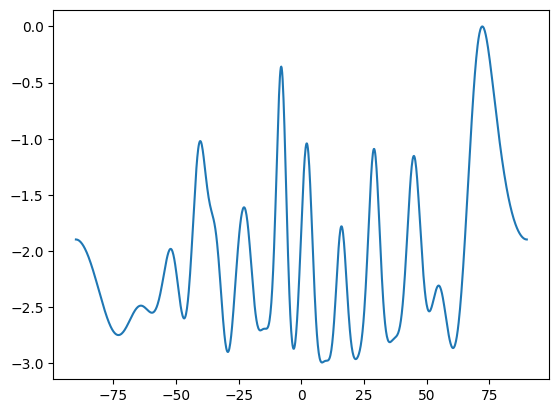

In [241]:
plt.plot(theta_range, output)